In [1]:
# Importing Necessary Libraries
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import TensorBoard
import time
import numpy as np
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [2]:
# Importing the Dataset
# MNIST is such a famous Dataset that TensorFlow has stored under its datasets
mnist = tf.keras.datasets.mnist #28*28 image of handwritten of 0-9 
# Loading the data into train and test files
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [3]:
# Checking the shape of Data
print("Training Data Shape is {}".format(x_train.shape))
print("Training Labels Shape is {}".format(y_train.shape))
print("Testing Data Shape is {}".format(x_test.shape))
print("Testing Labels Shape is {}".format(y_test.shape))

Training Data Shape is (60000, 28, 28)
Training Labels Shape is (60000,)
Testing Data Shape is (10000, 28, 28)
Testing Labels Shape is (10000,)


In [4]:
# Looking at the values inside an Image
print("Sample Training Data is {}".format(x_train[0]))

Sample Training Data is [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

In [5]:
# Looking at the Labels
print("Sample Training label is {}".format(y_train[0:5]))

Sample Training label is [5 0 4 1 9]


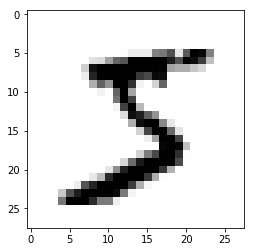

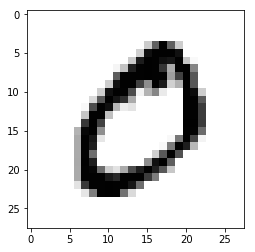

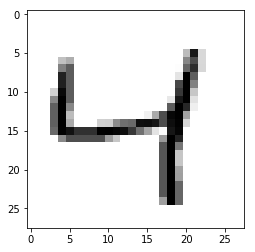

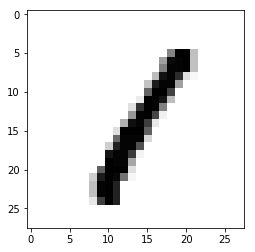

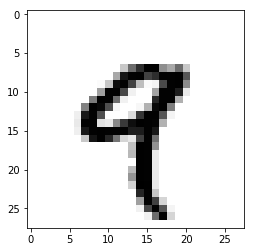

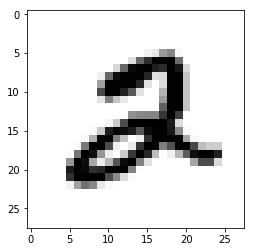

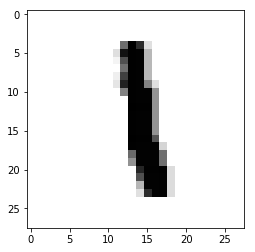

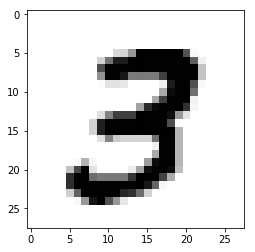

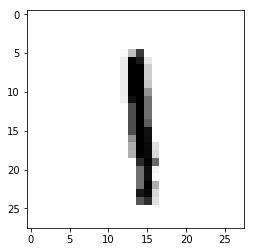

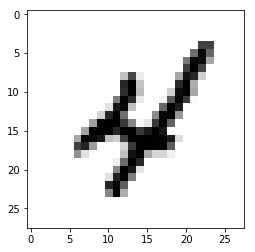

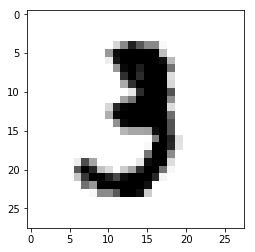

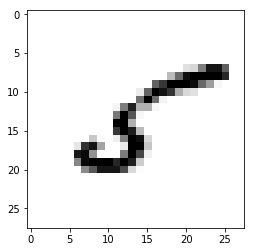

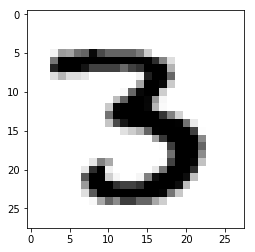

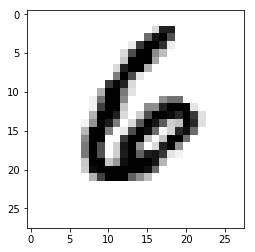

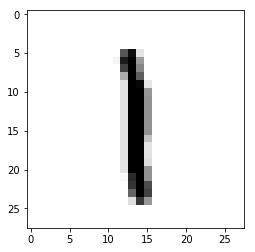

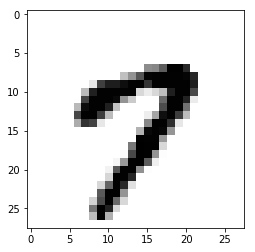

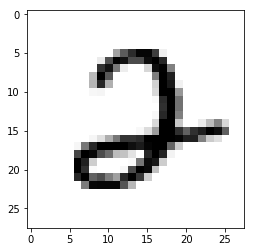

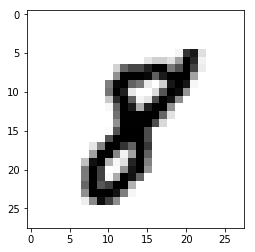

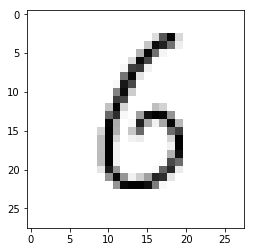

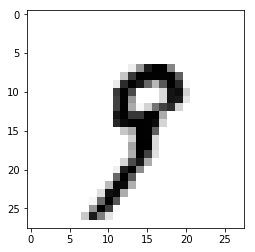

In [6]:
# Viewing the images
for i in range(0,20):
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.show()

In [7]:
# Normalizing the images 
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)

In [8]:
# Image data after normalizing
print("Training Data after normalizing is {}".format(x_train[0]))
print("Testing  Data after normalizing is {}".format(x_test[0]))

Training Data after normalizing is [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.       

In [9]:
# Creating the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # softmax for probability distribution
model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] )
model.fit(x_train,y_train,epochs = 3)

Epoch 1/3
60000/60000 [==============================] - 15s 242us/step - loss: 0.2676 - acc: 0.9206
Epoch 2/3
60000/60000 [==============================] - 12s 197us/step - loss: 0.1094 - acc: 0.9663
Epoch 3/3
60000/60000 [==============================] - 12s 195us/step - loss: 0.0737 - acc: 0.9763


In [10]:
# Storing the predictions on x_test
predictions = model.predict([x_test])

In [11]:
# Viewing the probability distribution for the predictions on first test data
print("Probability distribution for a multi-class classification")
predictions[0]

Probability distribution for a multi-class classification


array([1.0819480e-09, 6.2509069e-09, 9.8969997e-07, 1.0135948e-05,
       4.1838388e-10, 1.1031659e-08, 5.4120997e-14, 9.9998844e-01,
       2.8713231e-08, 5.2173476e-07], dtype=float32)

In [12]:
# Checking for which value the prediction is maximum
predictions[0].argmax()

7

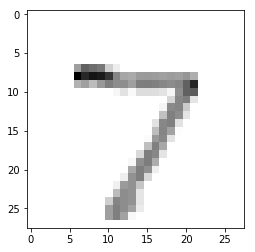

In [13]:
# First Test Data
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()

In [14]:
# Evaluation of the Model
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 77us/step
0.0961319257369265 0.9722


In [15]:
print(np.argmax(predictions[0]))

7


In [16]:
# Taking new_data through webcam
import cv2
cap = cv2.VideoCapture(0)
def make_1080p():
    cap.set(3, 1920)
    cap.set(4, 1080)
make_1080p()

def rescale_frame(frame, percent1=75,percent2= 75):
    width = int(frame.shape[1] * percent1/ 100)
    height = int(frame.shape[0] * percent2/ 100)
    dim = (width, height)
    return cv2.resize(frame, dim, interpolation =cv2.INTER_AREA)

while True:
    rect, frame = cap.read()
    frame = rescale_frame(frame,percent1= 30 ,percent2=100)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == 13:
        img = frame
        break
    elif cv2.waitKey(1) & 0xFF == 27:
        break
cap.release()
cv2.destroyAllWindows()

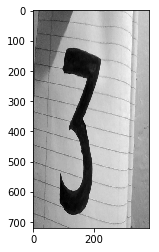

In [17]:
# Converting Color image to Black and White
bw_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(bw_img,cmap = 'gray')

In [18]:
# Enhancing the features of the image
ret,thres = cv2.threshold(bw_img,50,255,cv2.THRESH_BINARY)

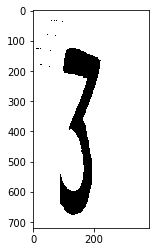

In [19]:
# Viewing Image
plt.imshow(thres,cmap = 'gray')

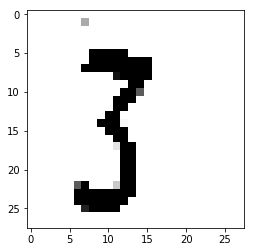

Probability Distribution for 0 3.574722e-05
Probability Distribution for 1 8.2674046e-07
Probability Distribution for 2 6.462894e-05
Probability Distribution for 3 0.86976546
Probability Distribution for 4 4.2723084e-08
Probability Distribution for 5 0.10066869
Probability Distribution for 6 2.9030357e-06
Probability Distribution for 7 1.04121855e-05
Probability Distribution for 8 0.029444288
Probability Distribution for 9 7.073567e-06
The Predicted Value is 3


In [20]:
# Converting image into appropriate shape and predicting its value
img_size = 28
thres = cv2.bitwise_not(thres)
new_array = cv2.resize(thres, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()
user_test = tf.keras.utils.normalize(new_array, axis = 1)
predicted = model.predict([[user_test]])
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",np.argmax(predicted[0]))

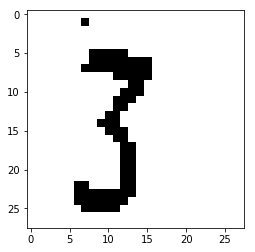

In [21]:
# Type=2: Applying threshold again on the normalized image
ret,new_user_test = cv2.threshold(user_test,.2,1,cv2.THRESH_BINARY)
plt.imshow(new_user_test,plt.cm.binary)

In [22]:
# Predicting probability through this new_user_test image
predicted = model.predict([[new_user_test]])
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",np.argmax(predicted[0]))

Probability Distribution for 0 1.7654218e-12
Probability Distribution for 1 8.6910146e-17
Probability Distribution for 2 1.1048808e-11
Probability Distribution for 3 0.99242437
Probability Distribution for 4 2.7048838e-21
Probability Distribution for 5 0.007575035
Probability Distribution for 6 4.313588e-17
Probability Distribution for 7 1.5299578e-14
Probability Distribution for 8 5.4261466e-07
Probability Distribution for 9 1.3160008e-11
The Predicted Value is 3


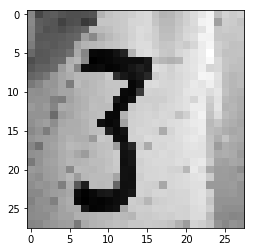

In [23]:
# Type-3 : Applying threshold only after size conversion
img_size = 28
bw_img2 = cv2.bitwise_not(bw_img.copy())
new_array2 = cv2.resize(bw_img2, (img_size,img_size))
plt.imshow(new_array2, cmap = plt.cm.binary)
plt.show()

In [24]:
ret,thres = cv2.threshold(new_array2,200,255,cv2.THRESH_BINARY)

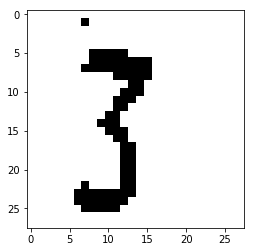

In [25]:
plt.imshow(thres,plt.cm.binary)

In [26]:
user_test = tf.keras.utils.normalize(thres, axis = 1)
predicted = model.predict([[user_test]])
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",np.argmax(predicted[0]))

Probability Distribution for 0 5.166995e-05
Probability Distribution for 1 1.2555888e-06
Probability Distribution for 2 6.835515e-05
Probability Distribution for 3 0.8984636
Probability Distribution for 4 5.6211885e-08
Probability Distribution for 5 0.06383997
Probability Distribution for 6 4.0393684e-06
Probability Distribution for 7 1.7279855e-05
Probability Distribution for 8 0.03754546
Probability Distribution for 9 8.333192e-06
The Predicted Value is 3


For Type-1: Probability of Correct Prediction = 86.97%.
For Type-2: Probability of Correct Prediction = 99.24%.
For Type-3: Probability of Correct Prediction = 89.85%.